# ĐỒ ÁN MÔN HỌC: NHẬN DẠNG

## I. Thực hiện kết nối với Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## II. Chuẩn bị những thứ cần thiết để chạy chương trình

### 1. Lấy source code

In [2]:
!unzip "/content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/Face-recognition-in-Near-InfraRed-images.zip"

Archive:  /content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/Face-recognition-in-Near-InfraRed-images.zip
   creating: Face-recognition-in-Near-InfraRed-images/
   creating: Face-recognition-in-Near-InfraRed-images/face_detection/
  inflating: Face-recognition-in-Near-InfraRed-images/face_detection/main.py  
  inflating: Face-recognition-in-Near-InfraRed-images/face_detection/yoloface_face_detection.py  
   creating: Face-recognition-in-Near-InfraRed-images/face_recognition/
  inflating: Face-recognition-in-Near-InfraRed-images/face_recognition/main.ipynb  
  inflating: Face-recognition-in-Near-InfraRed-images/README.md  
  inflating: Face-recognition-in-Near-InfraRed-images/requirements.txt  


### 2. Tải các thư viện cần thiết trong tập tin requirements.txt

In [3]:
!pip install -r /content/Face-recognition-in-Near-InfraRed-images/requirements.txt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
  Created wheel for yoloface: filename=yoloface-0.0.4-py3-none-any.whl size=5966 sha256=2cf749a59cbdf770259e157fdd03dbc6d02e12108a487561a5e0c3c8dd9c9f39
  Stored in directory: /root/.cache/pip/wheels/eb/1e/c5/fe45dcd89e48b843d316b94c9398f09f3e1f38c9715f245d91
Successfully built yoloface


### 3. Lấy dữ liệu Face_Recognition_NIR_Images

- Dữ liệu được lấy thông qua link: https://tdface.ece.tufts.edu/downloads/TD_NIR_A/
- Dữ liệu này bao gồm hình ảnh NIR qua nhiều góc quay khác nhau của 25 người

In [4]:
import os
import subprocess

In [5]:
!unzip "/content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/TD_NIR_A_Set.zip"

Archive:  /content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/TD_NIR_A_Set.zip
   creating: TD_NIR_A_Set/
   creating: TD_NIR_A_Set/test/
   creating: TD_NIR_A_Set/test/1/
  inflating: TD_NIR_A_Set/test/1/TD_NIR_A_1_3.jpg  
  inflating: TD_NIR_A_Set/test/1/TD_NIR_A_1_6.jpg  
  inflating: TD_NIR_A_Set/test/1/TD_NIR_A_2_3.jpg  
  inflating: TD_NIR_A_Set/test/1/TD_NIR_A_4_6.jpg  
   creating: TD_NIR_A_Set/test/10/
  inflating: TD_NIR_A_Set/test/10/TD_NIR_A_1_8.jpg  
  inflating: TD_NIR_A_Set/test/10/TD_NIR_A_3_1.jpg  
  inflating: TD_NIR_A_Set/test/10/TD_NIR_A_4_0.jpg  
  inflating: TD_NIR_A_Set/test/10/TD_NIR_A_4_6.jpg  
   creating: TD_NIR_A_Set/test/11/
  inflating: TD_NIR_A_Set/test/11/TD_NIR_A_1_0.jpg  
  inflating: TD_NIR_A_Set/test/11/TD_NIR_A_1_4.jpg  
  inflating: TD_NIR_A_Set/test/11/TD_NIR_A_4_0.jpg  
  inflating: TD_NIR_A_Set/test/11/TD_NIR_A_4_2.jpg  
   creating: TD_NIR_A_Set/test/12/
  inflating: TD_NIR_A_Set/test/12/TD_NIR_A_2_5.jpg  
  inflating: TD_NIR

### 4. Lấy dữ liệu yolo cropped images

In [6]:
subprocess.run(['unzip', '/content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/yolo_cropped_images.zip'])

CompletedProcess(args=['unzip', '/content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/yolo_cropped_images.zip'], returncode=0)

### 5. Import thư viện cần thiết

In [7]:
# import all libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K
import os
import cv2
import matplotlib.pyplot as plt
path=os.getcwd()
face_detection_path=os.getcwd(),"../"
print(os.getcwd())

/content


## III. Face Detection

## III.1. Sử dụng pp Face Detection

### 1. Importing các phương pháp face detection từ thư mục face_detection

Ở phần này, nhóm sử dụng kỹ thuật phát hiện khuôn mặt (face detection) dựa trên mô hình YOLOFace — một biến thể của mô hình YOLO (You Only Look Once) được huấn luyện chuyên biệt cho nhiệm vụ nhận diện khuôn mặt.

Nhóm đã tích hợp thư viện `yoloface`, cho phép tự động xác định vị trí của các khuôn mặt trong ảnh, vẽ khung (bounding box) bao quanh khuôn mặt và trích xuất (crop) từng khuôn mặt ra khỏi ảnh gốc. Các ảnh khuôn mặt sau khi được cắt sẽ được lưu lại để sử dụng cho các bước xử lý tiếp theo như nhận diện khuôn mặt hoặc huấn luyện mô hình.

In [8]:
import sys
import os
sys.path.append("/content/Face-recognition-in-Near-InfraRed-images/")

print("Importing face detection libraries....")
# Sử dụng YOLOFace để phát hiện khuôn mặt
from face_detection.yoloface_face_detection import yoloface_detection
print("Successfully import detection libraries")

Importing face detection libraries....


Downloading...
From: https://drive.google.com/uc?id=1JYrRT4Xe-NTrxYGhcj_hy7NtL4D2c77v
To: /content/.yoloface/yolov3-tiny_face.weights
100%|██████████| 34.7M/34.7M [00:00<00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1S4W6mpOQgVvjpPupbhW6rHFjl-OaUR-g
To: /content/.yoloface/yolov3_tiny_face.cfg
100%|██████████| 2.09k/2.09k [00:00<00:00, 4.36MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1EFlRsOA6oGLLBH2VMDOqHSfDI70CDXeW
From (redirected): https://drive.google.com/uc?id=1EFlRsOA6oGLLBH2VMDOqHSfDI70CDXeW&confirm=t&uuid=ebe260f0-5a39-4333-bddf-e93b575eea6c
To: /content/.yoloface/face_detection.weights
100%|██████████| 246M/246M [00:02<00:00, 99.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZxUmO0B1435taazz8P0Pqjq8r8Rypeip
To: /content/.yoloface/face_detection.cfg
100%|██████████| 8.34k/8.34k [00:00<00:00, 16.8MB/s]


Successfully import detection libraries


### 2. Thực hiện crop images bằng YOLOFace

Nhóm thực hiện gọi tập tin main.py trong thư mục face_detection để thực hiện phát hiện và xử lý khuôn mặt trên thư mục ảnh NIR.

In [9]:
import subprocess
if not os.path.exists(r'/content/yolo_cropped_images'):
  subprocess.run(['python', 'Face-recognition-in-Near-InfraRed-images/face_detection/main.py'])

In [10]:
!zip -r /content/yolo_cropped_images.zip /content/yolo_cropped_images

  adding: content/yolo_cropped_images/ (stored 0%)
  adding: content/yolo_cropped_images/train/ (stored 0%)
  adding: content/yolo_cropped_images/train/10/ (stored 0%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_4_1_aug_0_5934.jpg (deflated 4%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_2_4_aug_0_4493.jpg (deflated 4%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_3_6_aug_0_8704.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_1_4_aug_0_9453.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_1_2_aug_0_2057.jpg (deflated 4%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_3_2_aug_0_2327.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_4_3.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_4_7.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR_A_4_7_aug_0_6363.jpg (deflated 3%)
  adding: content/yolo_cropped_images/train/10/TD_NIR

## III.2. Tạo VGG-Face Model

### 1. Xây dựng lại mô hình kiến trúc VGG-Face model's

Trong phần này, nhóm sử dụng **kiến trúc mô hình VGG-Face**, một mạng nơ-ron tích chập sâu (Deep Convolutional Neural Network) được phát triển chuyên biệt cho **nhiệm vụ nhận diện khuôn mặt.**

Mô hình này được xây dựng dựa trên kiến trúc **VGG-16**, với cấu trúc gồm nhiều khối tích chập (**Conv2D**), xen kẽ với lớp đệm (**ZeroPadding2D**) và gộp (**MaxPooling2D**).

In [11]:
# Định nghĩa kiến trúc mô hình VGG-Face
model = Sequential()

# Khối 1
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

# Khối 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# Khối 3
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

# Khối 4
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

# Khối 5
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))

model.add(MaxPooling2D((2,2), strides=(2,2)))

# Lớp Fully-Connected dạng Conv và lớp Dropout
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))

# Lớp Flatten và Softmax
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 2. Load trọng số VGG-Face model

Thực hiện nạp trọng số mô hình VGG-Face đã được huấn luyện sẵn và loại bỏ lớp **softmax** cuối để sử dụng mô hình như một bộ trích đặc trưng khuôn mặt (face embedding extractor). Điều này cho phép so sánh, phân cụm hoặc nhận diện khuôn mặt dựa trên vector đặc trưng thay vì phân loại cố định.

In [12]:
!unzip "/content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/vgg_face_weights.zip"

Archive:  /content/drive/MyDrive/22120099-22120123-22120126-22120133/Source/data/vgg_face_weights.zip
  inflating: vgg_face_weights.h5     


In [13]:
# Load trọng số (weights) của mô hình VGG-Face
# Loại bỏ lớp Softmax cuối cùng
model.summary()
model.load_weights('/content/vgg_face_weights.h5')
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 226, 226, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 226, 226, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_2                │ (None, 114, 114, 64)   │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_3                │ (None, 114, 114, 128)  │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_4                │ (None, 58, 58, 128)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_5                │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_6                │ (None, 58, 58, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_7                │ (None, 30, 30, 256)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_8                │ (None, 30, 30, 512)    │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,80

 Total params: 145,002,878 (553.14 MB)

 Trainable params: 145,002,878 (553.14 MB)

 Non-trainable params: 0 (0.00 B)

## IV. Face Recognition

### 1. Chia tập train/valid/test:

Nhóm lấy dữ liệu ảnh khuôn mặt đã được cắt (từ YOLOFace) tách thành ba phần: tập huấn luyện (train), tập kiểm tra (test), và tập kiểm thử (validation)

In [14]:
import os
import shutil

# Đường dẫn gốc chứa các thư mục train, test, val sau khi YOLOFace crop
src_base = "/content/yolo_cropped_images"

# Map ánh xạ từ split sang thư mục đích
dest_map = {
    "train": "/content/images_train_crop",
    "test": "/content/images_test_crop",
    "val": "/content/images_val_crop"
}

# Duyệt qua từng split
for split in ["train", "test", "val"]:
    src_split_path = os.path.join(src_base, split)
    dst_split_path = dest_map[split]

    if not os.path.isdir(src_split_path):
        continue  # Bỏ qua nếu thư mục không tồn tại

    for person_id in os.listdir(src_split_path):
        src_person_path = os.path.join(src_split_path, person_id)
        dst_person_path = os.path.join(dst_split_path, person_id)

        if not os.path.isdir(src_person_path):
            continue

        os.makedirs(dst_person_path, exist_ok=True)

        for filename in os.listdir(src_person_path):
            src_file = os.path.join(src_person_path, filename)
            dst_file = os.path.join(dst_person_path, filename)
            shutil.copy2(src_file, dst_file)

### 2. Chuẩn bị dữ liệu huấn luyện (train)

Nhóm thực hiện chuẩn bị dữ liệu huấn luyện bằng cách:
- Đọc từng ảnh khuôn mặt đã được chia từ thư mục `images_train_crop`
- Resize ảnh về kích thước 224×224 (chuẩn của VGG)
- Chuyển ảnh thành mảng numpy, mở rộng chiều để thành batch với kích thước (1, 224, 224, 3).
- Thực hiện tiền xử lý theo chuẩn VGG
- Trích xuất đặc trưng khuôn mặt thông qua mô hình VGG-Face (VGG-Face đã cắt lớp softmax)
- Thêm đặc trưng vào x_train, gán nhãn số cho từng ảnh và lưu vào biến y_train.

Kết quả sau khi thực thi là:
- x_train: Danh sách lưu đặc trưng (features) của ảnh khuôn mặt đã trích xuất từ mô hình VGG-Face.
- y_train: Danh sách lưu nhãn (label) của từng ảnh, tương ứng với thứ tự người trong person_folders.
- person_rep: Tập ánh xạ giữa chỉ số (i) và tên người (tên thư mục chứa ảnh của người đó).

In [15]:
# Chuẩn bị tập train
# Khởi tạo các biến lưu dữ liệu huấn luyện
x_train=[]
y_train=[]
person_rep=dict()

# Duyệt qua dữ liệu trong images_train_crop
person_folders=os.listdir('/content/images_train_crop')
for i,person in enumerate(person_folders):
  person_rep[i]=person
  image_names=os.listdir('/content/images_train_crop/'+person+'/')
  print(person_rep[i])

  # Duyệt qua từng ảnh
  for image_name in image_names:
    print(image_name,end="\t")

    # Đọc và resize ảnh về kích thước 224x224 (chuẩn của VGG-Face)
    img=load_img('/content/images_train_crop/'+person+'/'+image_name,target_size=(224,224))

    # Chuyển ảnh thành mảng numpy
    img=img_to_array(img)

    # Mở rộng chiều ảnh để tạo thành batch có kích thước (1, 224, 224, 3)
    img=np.expand_dims(img,axis=0)

    # Tiền xử lý ảnh theo chuẩn VGG-Face
    img=preprocess_input(img)

    # Trích xuất đặc trưng khuôn mặt qua mô hình VGG-Face
    img_encode=vgg_face(img)

    # Thêm đặc trưng vào x_train, gán nhãn số cho từng ảnh và lưu vào biến y_train.
    x_train.append(np.squeeze(K.eval(img_encode)).tolist())
    y_train.append(i)

print(person_rep)

10
TD_NIR_A_4_1_aug_0_5934.jpg	TD_NIR_A_2_4_aug_0_4493.jpg	TD_NIR_A_3_6_aug_0_8704.jpg	TD_NIR_A_1_4_aug_0_9453.jpg	TD_NIR_A_1_2_aug_0_2057.jpg	TD_NIR_A_3_2_aug_0_2327.jpg	TD_NIR_A_4_3.jpg	TD_NIR_A_4_7.jpg	TD_NIR_A_4_7_aug_0_6363.jpg	TD_NIR_A_4_8.jpg	TD_NIR_A_3_2_aug_0_3915.jpg	TD_NIR_A_3_8_aug_0_5119.jpg	TD_NIR_A_3_4_aug_0_1009.jpg	TD_NIR_A_4_8_aug_0_6418.jpg	TD_NIR_A_4_3_aug_0_9817.jpg	TD_NIR_A_1_5.jpg	TD_NIR_A_1_4_noise.jpg	TD_NIR_A_4_3_noise.jpg	TD_NIR_A_1_5_aug_0_5784.jpg	TD_NIR_A_1_3_aug_0_9212.jpg	TD_NIR_A_1_3_noise.jpg	TD_NIR_A_3_6_aug_0_7582.jpg	TD_NIR_A_3_3_aug_0_1910.jpg	TD_NIR_A_3_5_noise.jpg	TD_NIR_A_3_4_aug_0_5668.jpg	TD_NIR_A_1_5_aug_0_5769.jpg	TD_NIR_A_3_7_aug_0_6881.jpg	TD_NIR_A_3_7_aug_0_1377.jpg	TD_NIR_A_4_7_aug_0_4683.jpg	TD_NIR_A_1_5_noise.jpg	TD_NIR_A_2_0_aug_0_9895.jpg	TD_NIR_A_2_1_aug_0_5007.jpg	TD_NIR_A_3_8.jpg	TD_NIR_A_1_2_aug_0_2676.jpg	TD_NIR_A_2_0.jpg	TD_NIR_A_4_1_aug_0_8315.jpg	TD_NIR_A_3_6_noise.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_3_5_aug_0_1168.jpg	TD_NIR_A_2_5

In [16]:
person_rep

{0: '10',
 1: '19',
 2: '21',
 3: '18',
 4: '22',
 5: '7',
 6: '2',
 7: '4',
 8: '1',
 9: '20',
 10: '13',
 11: '23',
 12: '8',
 13: '15',
 14: '11',
 15: '3',
 16: '25',
 17: '6',
 18: '16',
 19: '24',
 20: '17',
 21: '5',
 22: '9',
 23: '12',
 24: '14'}

### 3. Chuẩn bị dữ liệu kiểm thử (validation) và dữ liệu kiểm tra (test)

Nhóm cũng thực hiện tương tự với tập validation

In [17]:
# Chuẩn bị tập valid
x_val=[]
y_val=[]
person_folders=os.listdir('/content/images_val_crop')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/images_val_crop/'+person)
  print(person)
  for image_name in image_names:
    print(image_name,end="\t")
    img=load_img('/content/images_val_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_val.append(np.squeeze(K.eval(img_encode)).tolist())
    y_val.append(i)
  print()

10
TD_NIR_A_1_1.jpg	TD_NIR_A_4_5.jpg	TD_NIR_A_2_2.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_2_7.jpg	TD_NIR_A_4_2.jpg	TD_NIR_A_2_6.jpg	
19
TD_NIR_A_4_3.jpg	TD_NIR_A_4_5.jpg	TD_NIR_A_2_0.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_2_4.jpg	TD_NIR_A_2_1.jpg	
21
TD_NIR_A_2_8.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_2_7.jpg	TD_NIR_A_2_1.jpg	TD_NIR_A_1_7.jpg	TD_NIR_A_1_4.jpg	
18
TD_NIR_A_2_0.jpg	TD_NIR_A_2_8.jpg	TD_NIR_A_4_1.jpg	TD_NIR_A_1_7.jpg	TD_NIR_A_1_4.jpg	TD_NIR_A_1_2.jpg	
22
TD_NIR_A_1_1.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_2_8.jpg	TD_NIR_A_2_2.jpg	TD_NIR_A_4_0.jpg	TD_NIR_A_1_7.jpg	
7
TD_NIR_A_4_7.jpg	TD_NIR_A_4_5.jpg	TD_NIR_A_1_8.jpg	
2
TD_NIR_A_1_1.jpg	TD_NIR_A_4_7.jpg	TD_NIR_A_4_5.jpg	TD_NIR_A_3_1.jpg	TD_NIR_A_3_2.jpg	
4
TD_NIR_A_4_3.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_2_7.jpg	TD_NIR_A_2_3.jpg	TD_NIR_A_1_8.jpg	TD_NIR_A_1_4.jpg	
1
TD_NIR_A_1_1.jpg	TD_NIR_A_4_5.jpg	TD_NIR_A_4_2.jpg	TD_NIR_A_3_2.jpg	TD_NIR_A_1_4.jpg	
20
TD_NIR_A_4_7.jpg	TD_NIR_A_1_5.jpg	TD_NIR_A_2_2.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_1_7.jpg	
13
TD_NIR_A_1_5.jpg	TD_NIR_A_

Nhóm cũng thực hiện tương tự với tập test

In [18]:
# Chuẩn bị tập test
x_test=[]
y_test=[]
person_folders=os.listdir('/content/images_test_crop')
for i,person in enumerate(person_folders):
  image_names=os.listdir('/content/images_test_crop/'+person)
  print(person)
  for image_name in image_names:
    print(image_name,end="\t")
    img=load_img('/content/images_test_crop/'+person+'/'+image_name,target_size=(224,224))
    img=img_to_array(img)
    img=np.expand_dims(img,axis=0)
    img=preprocess_input(img)
    img_encode=vgg_face(img)
    x_test.append(np.squeeze(K.eval(img_encode)).tolist())
    y_test.append(i)
  print()

10
TD_NIR_A_4_6.jpg	TD_NIR_A_3_1.jpg	TD_NIR_A_1_8.jpg	TD_NIR_A_4_0.jpg	
19
TD_NIR_A_1_0.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_1_4.jpg	
21
TD_NIR_A_4_6.jpg	TD_NIR_A_2_4.jpg	
18
TD_NIR_A_1_6.jpg	TD_NIR_A_2_3.jpg	TD_NIR_A_4_2.jpg	
22
TD_NIR_A_4_6.jpg	TD_NIR_A_2_1.jpg	TD_NIR_A_1_4.jpg	
7
TD_NIR_A_4_6.jpg	TD_NIR_A_2_1.jpg	TD_NIR_A_1_7.jpg	
2
TD_NIR_A_2_4.jpg	TD_NIR_A_3_4.jpg	TD_NIR_A_4_2.jpg	
4
TD_NIR_A_1_5.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_2_4.jpg	TD_NIR_A_2_6.jpg	
1
TD_NIR_A_4_6.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_1_3.jpg	TD_NIR_A_2_3.jpg	
20
TD_NIR_A_1_5.jpg	TD_NIR_A_4_4.jpg	TD_NIR_A_2_5.jpg	
13
TD_NIR_A_3_5.jpg	TD_NIR_A_3_3.jpg	
23
TD_NIR_A_4_3.jpg	
8
TD_NIR_A_2_8.jpg	TD_NIR_A_2_2.jpg	TD_NIR_A_2_3.jpg	TD_NIR_A_3_4.jpg	
15
TD_NIR_A_2_0.jpg	TD_NIR_A_2_7.jpg	TD_NIR_A_4_0.jpg	TD_NIR_A_3_6.jpg	
11
TD_NIR_A_4_2.jpg	TD_NIR_A_1_4.jpg	
3
TD_NIR_A_1_5.jpg	TD_NIR_A_3_8.jpg	TD_NIR_A_2_4.jpg	TD_NIR_A_3_2.jpg	
25
TD_NIR_A_1_1.jpg	TD_NIR_A_2_0.jpg	
6
TD_NIR_A_1_1.jpg	TD_NIR_A_1_6.jpg	TD_NIR_A_3_7.jpg	TD_NIR_A_1_2.jpg	


### 4. Lưu lại dữ liệu sau khi xử lý:

Đầu tiên, các danh sách đặc trưng và nhãn được chuyển sang mảng NumPy để dễ dàng lưu trữ:

In [19]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_val=np.array(x_val)
y_val=np.array(y_val)
x_test=np.array(x_test)
y_test=np.array(y_test)

Sau đó, nhóm sử dụng hàm np.save() để lưu dữ liệu thành các tệp và tái sử dụng sau này

In [20]:
np.save('train_data_yolo_25_faces',x_train)
np.save('train_labels_yolo_25_faces',y_train)
np.save('val_data_yolo_25_faces',x_val)
np.save('val_labels_yolo_25_faces',y_val)
np.save('test_data_yolo_25_faces',x_test)
np.save('test_labels_yolo_25_faces',y_test)

x_train=np.load('train_data_yolo_25_faces.npy')
y_train=np.load('train_labels_yolo_25_faces.npy')
x_val=np.load('val_data_yolo_25_faces.npy')
y_val=np.load('val_labels_yolo_25_faces.npy')
x_test=np.load('test_data_yolo_25_faces.npy')
y_test=np.load('test_labels_yolo_25_faces.npy')

### 5. Sử dụng Softmax regression (multi-class classification) để phân loại ảnh khuôn mặt dựa trên đặc trưng (encoding) đã trích xuất từ mô hình VGG-Face.

### Lớp ẩn đầu tiên:
- **Dense(100)**: Tầng fully-connected với 100 đơn vị đầu ra, kích thước đầu vào là x_train.shape[1] = 2622.
- **BatchNormalization()**: Chuẩn hóa đầu ra để tăng tốc độ huấn luyện và tính ổn định.
- **Activation('tanh')**: Hàm kích hoạt phi tuyến, cho đầu ra trong khoảng $(-1, 1)$.
- **Dropout(0.3)**: Loại ngẫu nhiên 30% số node trong quá trình huấn luyện nhằm tránh overfitting.

### Lớp ẩn thứ hai:
- **Dense(6)**: Tầng fully-connected với 6 neuron. (Lưu ý: tầng này có thể được xem như tầng trung gian giảm chiều).
- **BatchNormalization()**, **Activation('tanh')** và **Dropout(0.2)**: Giống lớp trước, nhưng với tỉ lệ dropout thấp hơn.

### Lớp đầu ra (Output layer):
- **Dense(25)**: Số neuron bằng với số lớp cần phân loại (25 người).
- **Activation('softmax')**: Hàm kích hoạt softmax để chuyển đầu ra thành phân phối xác suất trên 25 lớp.

In [21]:
print(x_train.shape)

# Lớp ẩn đầu tiên
classifier_model=Sequential()
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))

# Lớp ẩn thứ hai
classifier_model.add(Dense(units=6,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))

# Lớp đầu ra
classifier_model.add(Dense(units=25,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

(2095, 2622)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 6. Huấn luyện mô hình

In [22]:
classifier_model.fit(x_train,y_train,epochs=80,validation_data=(x_val,y_val))

Epoch 1/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.4101 - loss: 2.1856 - val_accuracy: 0.8931 - val_loss: 1.3200
Epoch 2/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6605 - loss: 1.6282 - val_accuracy: 0.9313 - val_loss: 1.2432
Epoch 3/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7006 - loss: 1.5224 - val_accuracy: 0.9542 - val_loss: 1.1959
Epoch 4/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7066 - loss: 1.4324 - val_accuracy: 0.9618 - val_loss: 1.1288
Epoch 5/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 1.3367 - val_accuracy: 0.9618 - val_loss: 1.0567
Epoch 6/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7496 - loss: 1.2524 - val_accuracy: 0.9847 - val_loss: 0.9639
Epoch 7/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7777 - loss: 1.1870 - val_accuracy: 1.0000 - val_loss: 0.9046
Epoch 8/80
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7954 - loss: 1.1288 - val_accuracy: 1.0000 - val_loss

In [23]:
tf.keras.models.save_model(classifier_model,path+'/face_classifier_model_yolo_25_faces.h5')

### V. Thực nghiệm trên một số hình ảnh

In [24]:
classifier_model=tf.keras.models.load_model(path+'/face_classifier_model_yolo_25_faces.h5')

In [25]:
def plot(img):
  plt.figure(figsize=(8,4))
  plt.imshow(img[:,:,::-1])
  plt.show()

In [26]:
person_rep

{0: '10',
 1: '19',
 2: '21',
 3: '18',
 4: '22',
 5: '7',
 6: '2',
 7: '4',
 8: '1',
 9: '20',
 10: '13',
 11: '23',
 12: '8',
 13: '15',
 14: '11',
 15: '3',
 16: '25',
 17: '6',
 18: '16',
 19: '24',
 20: '17',
 21: '5',
 22: '9',
 23: '12',
 24: '14'}

In [27]:
from yoloface import face_analysis
face = face_analysis()

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [28]:
from google.colab.patches import cv2_imshow

In [29]:
from google.colab.patches import cv2_imshow  # Thêm nếu chưa có
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import cv2
import tensorflow.keras.backend as K
import os

# Định nghĩa model nhận diện khuôn mặt và phân loại danh tính
def detect_faces(image_path, output_path, face, vgg_face, classifier_model, person_rep):
    # Đọc ảnh
    frame = cv2.imread(image_path)
    if frame is None:
        print(f"Không tìm thấy ảnh: {image_path}")
        return

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Phát hiện khuôn mặt
    __, box, conf = face.face_detection(frame_arr=frame, frame_status=True, model='full')
    faces_rect = np.array([np.array(xi) for xi in box])

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(frame, (x, y), (x + h, y + w), (0, 255, 0), thickness=2)

        # Cắt vùng khuôn mặt
        img_crop = frame[y:y + w, x:x + h]
        face_crop_path = os.path.join(output_path, "face.jpg")
        try:
            cv2.imwrite(face_crop_path, img_crop)
        except Exception as e:
            print(f"Lỗi khi ghi ảnh khuôn mặt: {e}")
            continue

        # Tiền xử lý ảnh
        try:
            crop_img = load_img(face_crop_path, target_size=(224, 224))
            crop_img = img_to_array(crop_img)
            crop_img = np.expand_dims(crop_img, axis=0)
            crop_img = preprocess_input(crop_img)
        except Exception as e:
            print(f"Lỗi khi xử lý ảnh: {e}")
            continue

        # Trích xuất đặc trưng
        img_encode = vgg_face(crop_img)
        embed = K.eval(img_encode)

        # Dự đoán danh tính
        person = classifier_model.predict(embed)
        name = person_rep[np.argmax(person)]
        print(f"Phát hiện: {name} (score = {np.max(person):.2f})")

        # Vẽ kết quả lên ảnh
        cv2.rectangle(gray, (x, y), (x + h, y + w), (0, 255, 0), 2)
        if np.max(person) > 0.80:
            cv2.putText(gray, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(gray, str(np.max(person)), (x, y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 1, cv2.LINE_AA)

    # Hiển thị ảnh kết quả trong Colab
    cv2_imshow(gray)

    # Ghi ảnh đã xử lý
    try:
        cv2.imwrite(os.path.join(output_path, "detected_faces.jpg"), gray)
    except Exception as e:
        print(f"Lỗi khi lưu ảnh kết quả: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 908ms/step
Phát hiện: 18 (score = 0.98)


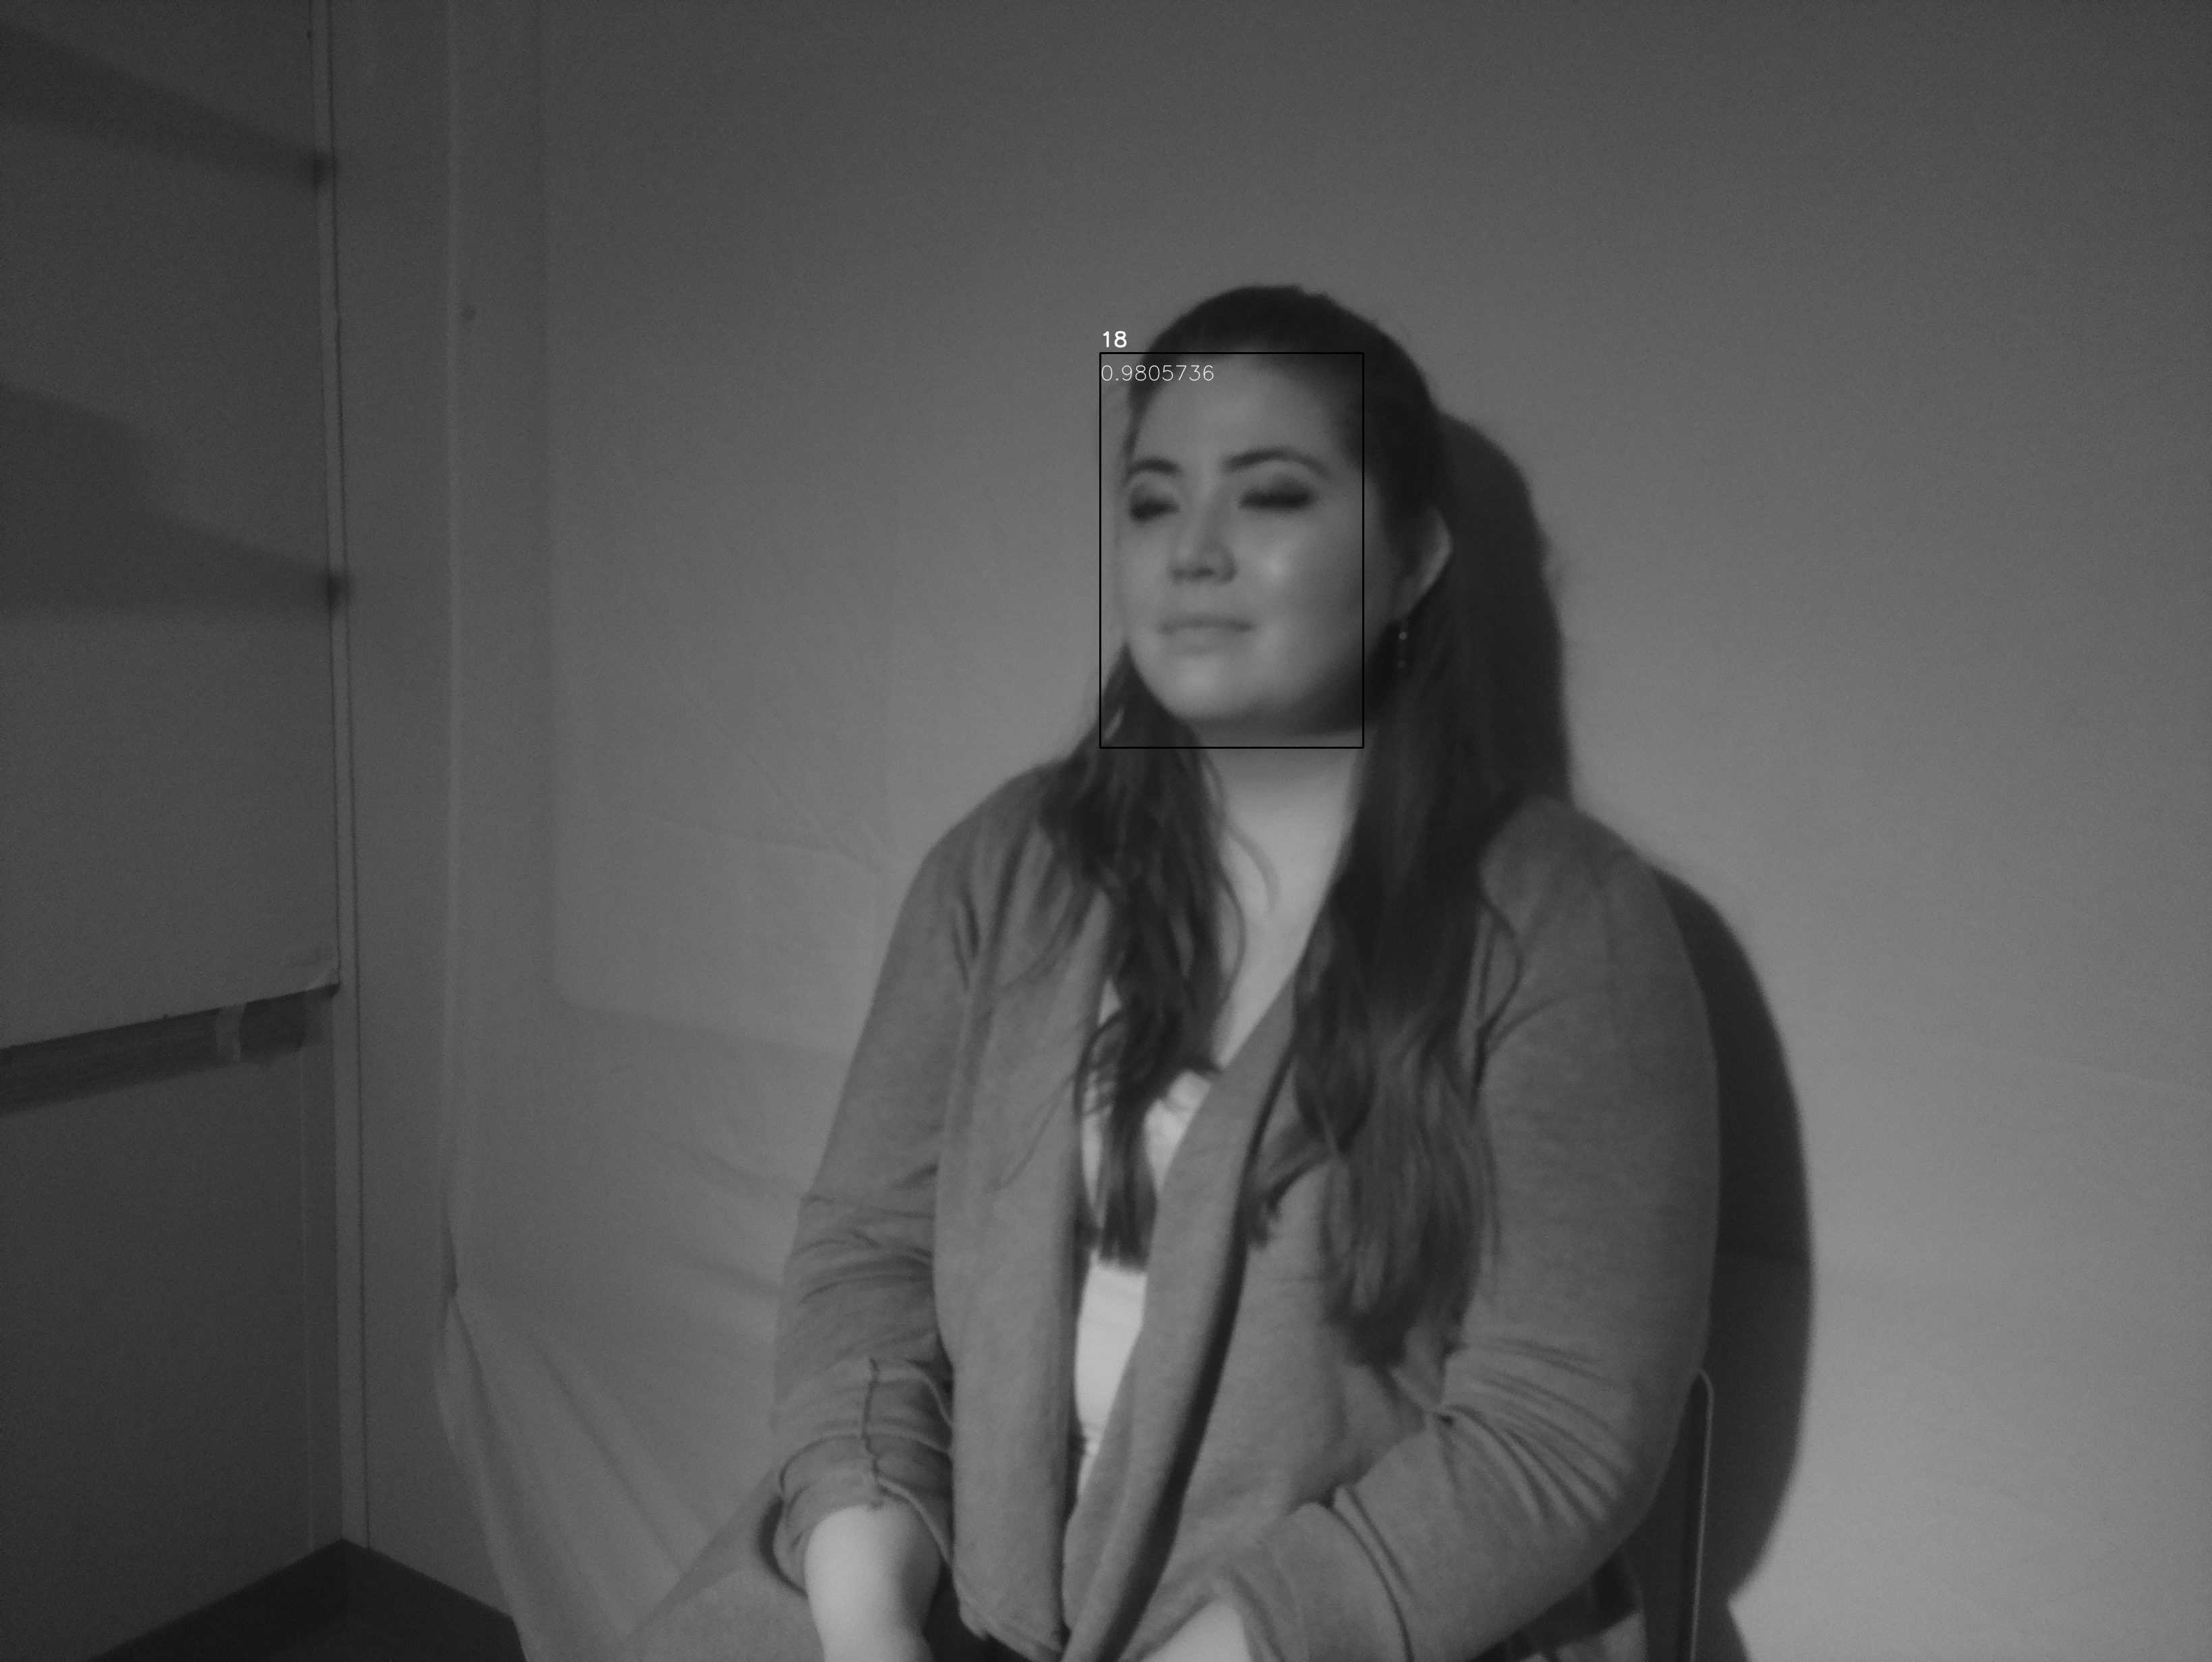

In [30]:
# Sử dụng hàm
os.makedirs(r'/content/output', exist_ok=True)
detect_faces("/content/TD_NIR_A_Set/test/18/TD_NIR_A_1_6.jpg", "/content/output", face, vgg_face, classifier_model, person_rep)